In [83]:
%pip install pandas 
%pip install numpy 
%pip install scikit-learn
%pip install matplotlib 
%pip install seaborn
%pip install joblib
%pip install imbalanced-learn



Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/9d/41/721fec82606242a2072ee909086ff918dfad7d0199a9dfd4928df9c72494/imbalanced_learn-0.13.0-py3-none-any.whl.metadata
  Obtaining dependency information for sklearn-compat<1,>=0.1 from https://files.pythonhosted.org/packages/f0/a8/ad69cf130fbd017660cdd64abbef3f28135d9e2e15fe3002e03c5be0ca38/sklearn_compat-0.1.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/238.4 kB ? eta -:--:--
   ------------ --------------------------- 71.7/238.4 kB 3.8 MB/s eta 0:00:01
   ---------------------------------------- 238.4/238.4 kB 3.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib

In [85]:
df = pd.read_csv("vat_data_large.csv")  # Assuming a CSV file with VAT transactions
print(df.head())
print(df.info())

   Transaction_ID  Amount  VAT_Rate  Country Item_Category  Applied_VAT
0               1  958.54      0.20       UK     Furniture       191.71
1               2  228.24      0.18  Germany      Clothing        41.08
2               3  887.32      0.18  Germany      Clothing       159.72
3               4  934.96      0.20  Germany      Clothing       186.99
4               5  917.26      0.05       UK     Furniture        45.86
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Transaction_ID  10000 non-null  int64  
 1   Amount          10000 non-null  float64
 2   VAT_Rate        10000 non-null  float64
 3   Country         10000 non-null  object 
 4   Item_Category   10000 non-null  object 
 5   Applied_VAT     10000 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 468.9+ KB
None


In [97]:
# Create expected VAT and error flag
df['Expected_VAT'] = df['Amount'] * df['VAT_Rate']
df['VAT_Diff'] = np.abs(df['Expected_VAT'] - df['Applied_VAT'])
df['Error_Flag'] = (df['VAT_Diff'] > 0.5).astype(int)

In [98]:
# One-hot encode categorical features safely
columns_to_encode = [col for col in ['Country', 'Item_Category'] if col in df.columns]
df = pd.get_dummies(df, columns=columns_to_encode)

In [99]:
# Drop non-numeric or unused columns
X = df.drop(['Transaction_ID', 'Applied_VAT', 'Error_Flag'], axis=1)
y = df['Error_Flag'].astype(int)

In [90]:
# Handle Class Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [100]:
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
# 1. Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [102]:
# 2. Train the Random Forest model with class_weight='balanced' to give more importance to class 1 (error)
model = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42, class_weight='balanced')
model.fit(X_resampled, y_resampled)

RandomForestClassifier(class_weight='balanced', max_depth=20, n_estimators=200,
                       random_state=42)

In [103]:
# 3. Predictions and Evaluate
y_probs = model.predict_proba(X_test)[:, 1]  # Get probabilities for class 1 (error)
y_pred = (y_probs > 0.3).astype(int)  # Adjust threshold for better recall

In [104]:
# 4. Print Evaluation Metrics
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🔍 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📈 ROC AUC Score:", roc_auc_score(y_test, y_probs))

✅ Accuracy: 0.9995

📊 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1825
           1       0.99      1.00      1.00       175

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000


🔍 Confusion Matrix:
 [[1824    1]
 [   0  175]]

📈 ROC AUC Score: 1.0


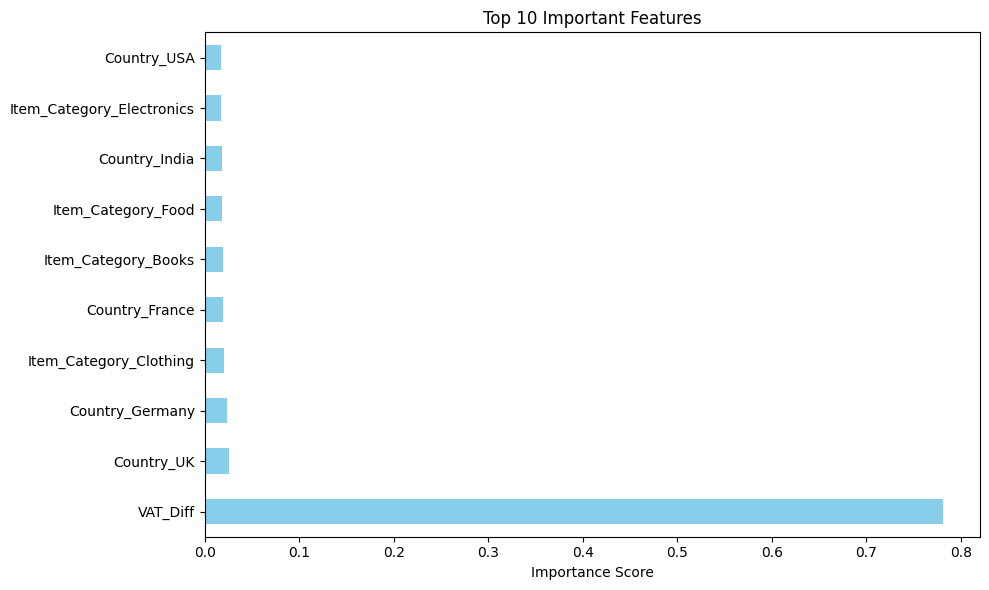

In [105]:
# 5. Plot Feature Importances
importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
importances.nlargest(10).plot(kind='barh', color='skyblue')
plt.title("Top 10 Important Features")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

In [108]:
print(X.columns.tolist())


['Amount', 'VAT_Rate', 'Expected_VAT', 'VAT_Diff', 'Country_France', 'Country_Germany', 'Country_India', 'Country_UK', 'Country_USA', 'Item_Category_Books', 'Item_Category_Clothing', 'Item_Category_Electronics', 'Item_Category_Food', 'Item_Category_Furniture']


In [107]:
joblib.dump(model, 'vat_error_model.joblib')


['vat_error_model.joblib']